In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from cs336_data.classify import classify_nsfw, classify_toxic_speech
from tqdm.auto import tqdm

In [2]:
nsfw_model_path = "../data/jigsaw_fasttext_bigrams_nsfw_final.bin"
toxic_speech_model_path = "../data/jigsaw_fasttext_bigrams_hatespeech_final.bin"

In [7]:
tab = []
for i in range(1, 26):
    if i >= 4:
        patch_i = i + 1
    else:
        patch_i = i
    with open(f"../data/warc_txt/{patch_i}.txt", "r") as f:
        text = f.read()
    nsfw_label, nsfw_prob = classify_nsfw(nsfw_model_path, text)
    toxic_speech_label, toxic_speech_prob = classify_toxic_speech(
        toxic_speech_model_path, text
    )
    tab.append(
        {
            "#": i,
            "Text (truncated)": text[:40].replace("\n", "\\n").replace("|", "\|"),
            "NSFW Label": nsfw_label,
            "NSFW Confidence": f"{nsfw_prob:.3f}",
            "Toxic Speech Label": toxic_speech_label,
            "Toxic Speech Confidence": f"{toxic_speech_prob:.3f}",
        }
    )
df = pd.DataFrame(tab)
df

,#,Text (truncated),NSFW Label,NSFW Confidence,Toxic Speech Label,Toxic Speech Confidence
0,1,• Home\n • Categories\n • New\n • Popu,non-nsfw,1.000,non-toxic,1.000
1,2,Sorry this model no exist in webcams onl,non-nsfw,1.000,non-toxic,1.000
2,3,三元风水 神通玄空 家居风水 喜庆择日 起名改名 旺宅安神 转运法事 风水软件,non-nsfw,0.996,non-toxic,0.999
3,4,Skip to content\n\nquello che è un fungo s,non-nsfw,0.997,non-toxic,0.989
4,5,Search The Directory\nSubmit URL \nHome >,non-nsfw,1.000,non-toxic,1.000
5,6,banner\nbanner to be\nterug naar e-spots.n,non-nsfw,0.995,non-toxic,1.000
6,7,03 онлайн 03 Онлайн Задать вопрос Наши в,non-nsfw,0.716,non-toxic,0.876
7,8,banner\nbanner to be\nterug naar e-spots.n,non-nsfw,0.999,non-toxic,1.000
8,9,24HR客服專線:02-27654066 \n \n \n帳 號\n密 碼\n圖片,non-nsfw,0.926,non-toxic,0.926
9,10,\n客服留言\n客服留言\n\n熱門關鍵字\n 關鍵字\n威而鋼 viagra 壯陽藥 犀利,non-nsfw,0.631,non-toxic,0.680


In [9]:
nsfw_probs = []
for i in tqdm(range(1, 100)):
    with open(f"../data/warc_txt/{i}.txt", "r") as f:
        text = f.read()
    nsfw_label, nsfw_prob = classify_nsfw(nsfw_model_path, text)
    if nsfw_label == "nsfw":
        nsfw_probs.append(nsfw_prob)

  0%|          | 0/99 [00:00<?, ?it/s]

In [10]:
len(nsfw_probs), len(nsfw_probs) / 1000

(0, 0.0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

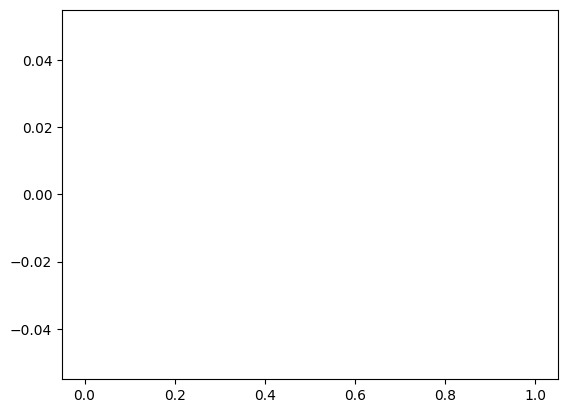

In [11]:
plt.hist(nsfw_probs)

In [12]:
toxic_speech_probs = []
for i in tqdm(range(1, 100)):
    with open(f"../data/warc_txt/{i}.txt", "r") as f:
        text = f.read()
    toxic_speech_label, toxic_speech_prob = classify_toxic_speech(
        toxic_speech_model_path, text
    )
    if toxic_speech_label == "toxic":
        toxic_speech_probs.append(toxic_speech_prob)

  0%|          | 0/99 [00:00<?, ?it/s]

In [13]:
len(toxic_speech_probs), len(toxic_speech_probs) / 1000

(0, 0.0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

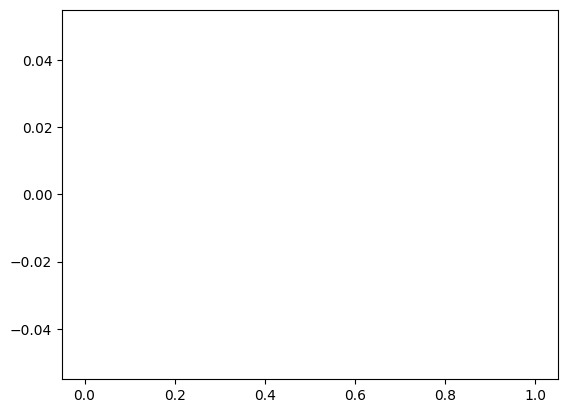

In [14]:
plt.hist(toxic_speech_probs)

In [52]:
import fasttext

In [53]:
nsfw_model = fasttext.load_model(nsfw_model_path)

In [60]:
texts = []
for i in tqdm(range(1, 48_368)):
    with open(f"../data/warc_txt/{i}.txt", "r") as f:
        text = f.read()
    texts.append(text)

  0%|          | 0/48367 [00:00<?, ?it/s]

In [61]:
for i in range(len(texts)):
    texts[i] = texts[i].replace("\n", " ")

In [62]:
nsfw_labels, nsfw_probs = nsfw_model.predict(texts)

In [63]:
nsfw_labels = [l[0] for l in nsfw_labels]
nsfw_probs = [p[0] for p in nsfw_probs]

In [66]:
nsfw_hist_probs = [
    nsfw_probs[i] for i in range(len(nsfw_probs)) if nsfw_labels[i] == "__label__nsfw"
]

In [68]:
len(nsfw_hist_probs), len(nsfw_hist_probs) / len(nsfw_probs)

(211, 0.004362478549424194)

(array([  6.,  11.,  12.,  11.,  19.,   9.,   9.,   9.,  13., 112.]),
 array([0.50507736, 0.55457062, 0.60406387, 0.65355718, 0.70305043,
        0.75254369, 0.80203694, 0.85153019, 0.90102351, 0.95051676,
        1.00001001]),
 <BarContainer object of 10 artists>)

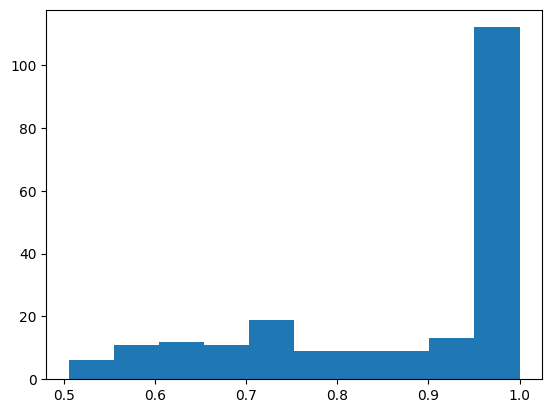

In [69]:
plt.hist(nsfw_hist_probs)

In [70]:
non_nsfw_hist_probs = [
    nsfw_probs[i] for i in range(len(nsfw_probs)) if nsfw_labels[i] == "__label__non-nsfw"
]

(array([1.8000e+01, 3.8000e+01, 6.0000e+01, 8.7000e+01, 1.5700e+02,
        1.9300e+02, 2.7600e+02, 4.8100e+02, 9.6000e+02, 4.5886e+04]),
 array([0.50057495, 0.55051845, 0.60046196, 0.65040547, 0.70034897,
        0.75029248, 0.80023599, 0.85017949, 0.900123  , 0.95006651,
        1.00001001]),
 <BarContainer object of 10 artists>)

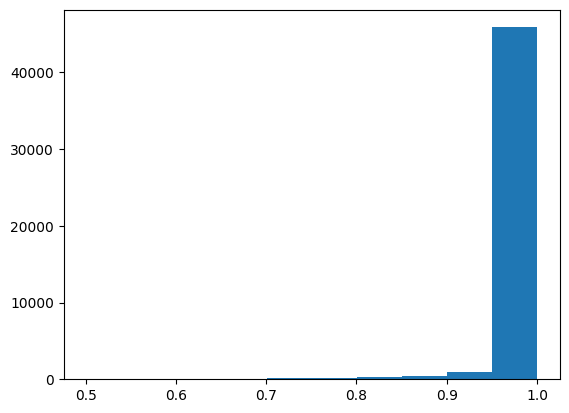

In [71]:
plt.hist(non_nsfw_hist_probs)

In [72]:
toxic_speech_model = fasttext.load_model(toxic_speech_model_path)

In [73]:
texts = []
for i in tqdm(range(1, 48_368)):
    with open(f"../data/warc_txt/{i}.txt", "r") as f:
        text = f.read()
    texts.append(text)

  0%|          | 0/48367 [00:00<?, ?it/s]

In [74]:
for i in range(len(texts)):
    texts[i] = texts[i].replace("\n", " ")

In [75]:
toxic_speech_labels, toxic_speech_probs = toxic_speech_model.predict(texts)

In [76]:
toxic_speech_labels = [l[0] for l in toxic_speech_labels]
toxic_speech_probs = [p[0] for p in toxic_speech_probs]

In [80]:
toxic_speech_hist_probs = [
    toxic_speech_probs[i] for i in range(len(toxic_speech_probs)) if toxic_speech_labels[i] == "__label__toxic"
]

In [81]:
len(toxic_speech_hist_probs), len(toxic_speech_hist_probs) / len(toxic_speech_probs)

(515, 0.010647755701201233)

(array([ 38.,  44.,  36.,  17.,  25.,  28.,  29.,  25.,  39., 234.]),
 array([0.50095689, 0.55086219, 0.60076749, 0.65067285, 0.70057815,
        0.75048345, 0.80038875, 0.85029405, 0.90019941, 0.95010471,
        1.00001001]),
 <BarContainer object of 10 artists>)

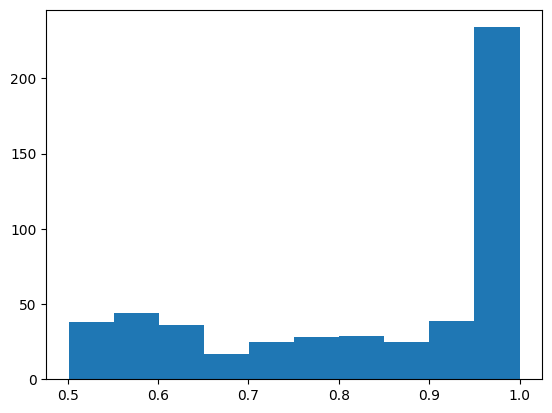

In [82]:
plt.hist(toxic_speech_hist_probs)

In [83]:
non_toxic_speech_hist_probs = [
    toxic_speech_probs[i] for i in range(len(toxic_speech_probs)) if toxic_speech_labels[i] == "__label__non-toxic"
]

(array([   54.,    55.,    70.,   104.,   175.,   200.,   332.,   566.,
         1124., 45172.]),
 array([0.50313389, 0.55282152, 0.60250914, 0.65219671, 0.70188433,
        0.75157195, 0.80125958, 0.8509472 , 0.90063477, 0.95032239,
        1.00001001]),
 <BarContainer object of 10 artists>)

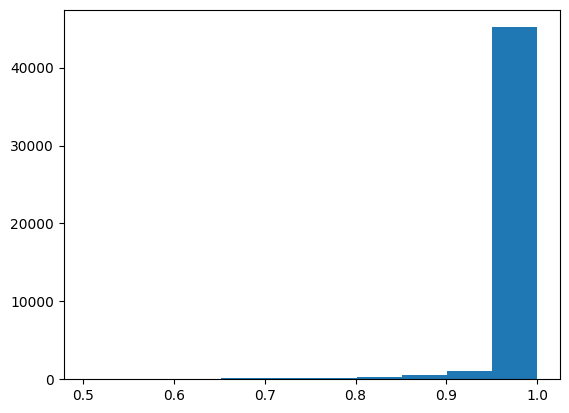

In [85]:
plt.hist(non_toxic_speech_hist_probs)

In [86]:
nsfw_texts = [texts[i] for i in range(len(texts)) if nsfw_labels[i] == "__label__nsfw"]

In [93]:
for i in range(20):
    print(nsfw_texts[i])
    print()
    print()

﻿ sexycena35 web cams big tits blowjob vid  sexycena35  Free Chat Cam  BeautyAliana web cams big tits blowjob fuck  BeautyAliana personal details:  BeautyAliana  BeautyAliana is years old cam performer, doing live shows in webcams category, speaking languages. Webcam model screen Name: BeautyAliana BeautyAliana has build. BeautyAliana turns on: BeautyAliana turns off: BeautyAliana is willing to do in shows: vid , shaved, stockings, anal sex, dildo, vibrator, striptease, dancing, cameltoe, smoke cigarette, zoom, close up, roleplay, fingering, live orgasm, oil, snapshot  BeautyAliana Tags  sexycena35 jasmin sexycena35 video chat sexycena35 online cam sexycena35 porn sexycena35 private sexycena35 Jasmin webcam   littleredbunny Livejasmin sex photo raisabella free cams oLICKmyPUSSYo livejasmin sex cam KARINASS chat lj live show littleredbunny Livejasmin sex photo WildSexBlondy Naked chat live 1YummyGirl live cam chat free KARINASS chat lj live show sexxyblue pictures chat room SandraDream 

In [94]:
non_nsfw_texts = [texts[i] for i in range(len(texts)) if nsfw_labels[i] == "__label__non-nsfw"]

In [95]:
for i in range(20):
    print(non_nsfw_texts[i])
    print()
    print()

  • Home   • Categories   • New   • Popular   • Submit   • RSS   • Contact false 5 5 5      000 084 Pages:  1 2 3  Freeware Mac   Testkingworld.com is your ultimatel source for the System x High Performance Servers... Details   One of the best and most rewarding features of the 000-084 training materials are that... Details   Download free 000-084 questions and answers. 000-084 exam questions are ultimate... Details   Pass-Guaranteed is the leader in IT Certifications that offers a 100% Money Back... Details   One of the best and most rewarding features of the 9A0-084 training materials are that... Details    Relevant Tags  000 084 exam - our 000 084 - IBM 000-084 - Download 000-084 - 000 084 Exam Demo - 000 084 Exam - hp0 084 practice - our hp0 084 - 9A0-084 - ADOBE 9A0-084        000 084 in Software Title  1. 000-084 Test Prep Training Premier ... Servers Technical Support V3 000-084 exam preparation. With our 000-084 study notes, you can ... to take on your 000-084 Exam.All of our t

In [96]:
non_nsfw_texts[10]

' 客服留言 客服留言  熱門關鍵字 \xa0關鍵字 威而鋼 viagra 壯陽藥 犀利士 cialis 樂威壯 levitra 美國黑金 blackgold 一炮到天亮 卡宴 催情 春藥 壯陽 堅挺 增大 增粗 陰莖 草本 原裝 做愛 持久 偉哥 印度神油 黑螞蟻 生精片 鹿血片 華陀神丹 一想就硬 中醫 三體牛鞭 補腎丸 蒼蠅粉 迷姦 愛神二代 aphrodisiac 瑪卡maca 日本藤素 金偉哥  目錄分類 》男性口服壯陽 (63) 》男性外用持久 (19) 》男性增強粗大 (10) 》女性催情春藥 (21)  性愛知識 六大導致勃起...880 讚 如果停止性愛...795 讚 八句男人不該...847 讚 更美好性生活...814 讚 嘿咻真的能夠...875 讚 男人如何才能...785 讚 三妙招讓你性...841 讚 何謂性無能（...788 讚 女人高潮居然...817 讚 適合在浴室裡...885 讚  相關說明 威而鋼使用須知 犀利士與其它商品差異 樂威壯將挑戰威而鋼 美國黑金強效壯陽藥    行動連結 99RX Group QRcode 美國黑金效果, 美國黑金性藥品, 美國黑金購買, 美國黑金 BlackGold 台灣專賣, 美國黑金哪裡買, 美國黑金男性口服壯陽, 美國黑金價格, 美國黑金壯陽藥, 治療ED性功能障礙  美國黑金 BlackGold 台灣專賣RX | 請認明正版台灣99RX系列，安全有保障  99RX壯陽藥\xa0 美國黑金\xa0 威而鋼\xa0 犀利士\xa0 樂威壯\xa0  最新快報：造價近20億台幣張榮發專機出售傳買主是成龍 美國黑金男性口服壯陽, 美國黑金哪裡買, 美國黑金壯陽藥, 美國黑金效果, 美國黑金購買, 治療ED性功能障礙, 美國黑金 BlackGold 台灣專賣, 美國黑金價格, 美國黑金性藥品 美國黑金 BlackGold 台灣專賣  美國黑金性藥品, 美國黑金男性口服壯陽, 治療ED性功能障礙, 美國黑金價格, 美國黑金哪裡買, 美國黑金 BlackGold 台灣專賣, 美國黑金購買, 美國黑金效果, 美國黑金壯陽藥 正品原裝\xa0\xa0\xa0\xa0 包裝隱密\xa0\xa0\xa0\xa0 免運送費\xa0\xa0\xa0\xa0 貨到付款  美國黑金 BlackGold 台灣專賣R

In [98]:
non_nsfw_texts[9]

"24HR客服專線:02-27654066\xa0\xa0 \u3000\u3000 \u3000 帳\xa0\xa0號 密\xa0\xa0碼 圖片驗證 如果您已經是本中心會員者，請輸入您的帳號及密碼登入。不是會員請先加入會員。您忘記密碼可進入查詢密碼。 \u3000 COPYRIGHT(C)2006 0509.7540.info ALL RIGHTS RESERVED.  視訊聊天行動裝置APP開放下載 APP使用說明\xa0QR Code說明 iOS版設備需求 : 1. iOS 4.3以上版本 2. iPhone, iPad, iPod touch Android版設備需求 : 1. ARMv7處理器, 550MHz以上cpu 2. 256MB以上記憶體 3. Android 2.2 以上 → iOS安裝後出現 '尚未信任企業級開發人員' 請點此 \xa0\xa0\xa0 → 暫不支援QQ 與微信掃一掃, 其它下載方式請點此 網站廣告聯盟 我要性交網 幼童性交影片 性交圖 女性交友留言版台北 人獸性交 性交自拍短片 視訊性交vcd 幼女性交網 無碼性交片 孕媽咪性交高潮 性交圖片區 美女性交圖片 歐美性交片 性交動作 性交貼圖站 性交疼痛出血 美女區性交 性交辣妹 成人性交 性交影片線上看 免費線上性交影片直播 免費日本性交影片 成人性交文學 成人a片性交下載 人妖性交影片 激情性交 性交自拍免費看 免費性交片 日本性交配貼片 性交後出血 性交照片 免費線上性交圖片 男女性交自拍 性交姿式圖片 偷拍媽媽性交 高雄性交色情 視訊性交影片 母子性交 免費男女性交影片 性交友網 亂倫免費影片網 母子亂倫視訊 亂倫色情片 女人性愛亂倫 亞洲亂倫影片 情色亂倫影片 亂倫情色小說 免費亂倫小說 亂倫a圖 亂倫片 自拍亂倫影片 3d兄妹亂倫 超熟女老師與我亂倫性愛故事文章 亂倫小說維克斯 亂倫性交貼片 亂倫偷拍 女人愛看亂倫性愛片 成人文學區亂倫 成人亂倫短片 亂倫性愛小說 亂倫免費飲片 亂倫情色影片 歐美視訊亂倫無碼 免費線上亂倫ａｖ 亂倫小說故事 姊弟亂倫日 亂倫av 亂倫性愛文學小說 亂倫的動畫 亂倫之文章 歐美近親亂倫 亂倫a片 家庭亂倫內射 台灣母子亂倫 亂倫免費a片 亂倫愛愛小說 亂倫ˊˊˊ 本土亂倫貼片 亂倫性愛文章 姐弟亂倫文章 meme104 ut 聊天 a

In [101]:
toxic_speech_texts = [texts[i] for i in range(len(texts)) if toxic_speech_labels[i] == "__label__toxic"]

In [102]:
for i in range(20):
    print(toxic_speech_texts[i])
    print()
    print()

會員登入加入會員查詢密碼 客服QQ:2094229240@qq.com   　　 　 帳  號  密  碼  圖片驗證   如果您已經是本中心會員者，請輸入您的帳號及密碼登入。不是會員請先加入會員。您忘記密碼可進入查詢密碼。 　 COPYRIGHT(C)2006 1712275.kk9001.com ALL RIGHTS RESERVED. 寫真圖片,麗的情小遊戲,南美水族論壇-大香蕉社區 寫真美女圖,麗的小遊戲,凱迪社區-大香蕉網在線視頻 寫真美女,麗的娛樂網,女人毛片-伊人在線大香蕉 壇蜜寫真集,女人毛片2014年在線觀看,天天擼大香蕉 色視訊,色系軍團,527娛樂多人視頻聊天 ING視訊聊天網,4S快播看毛片,色聊聊天記錄 ING視訊側錄,三級毛片視頻,色聊聊天室下載 國外免費視訊,三級毛片在線觀看,色聊語音聊天室下載 金瓶梅視訊美女,29瓦特快播毛片,免費色聊聊天室 網路視訊美女,日日毛片,色聊可視語音聊天室 免費視訊軟體,無毒毛片網址,免費色聊表演聊天室 UT視訊聊天交友,酷9倫理免費電影,微信色聊群或者聊天室 聊天交友網站,手機視訊交友,淫淫網-國外聊天室色聊 網路視訊交友,色色色情性交電影網,色聊語音聊天室 美女視訊直播,天天好逼網情色網,午夜網址你懂的 手機視訊交友應用,成人動漫網,午夜電影網你懂得 后宮影音聊天網,免費成人電影圖片,午夜網站你懂得 成人聊天室,17K色情成人在線電影下載,在線聊天室你懂的 情色聊天室,嫂嫂成人影院,q秀聊天室吧 麗的情色網,色情聊天室,歪歪色影院,q全球視頻聊天室 網絡色情視頻聊天室直播,色色五夜天,聖魔聊天室 色情視頻聊天室,色AV電影,SM聖魔聊天室 色情遊戲裸聊,性視頻電影在線觀看,性聊天QQ群 情色自拍,聊天交友網站,色情免費電影,線上性聊天網 UT視訊正妹,3級愛情片,性話題網聊女的QQ記錄 MFC視訊網,人妻小說黃色片網址,成都美女性上門服務QQ 日本視訊網站,開心色色網,北京性夥伴伴侶QQ網 華夏視訊網,我要播播性交網,廣州美女性上門服務QQ 免費情色影片,開心情色站,百性閣官網 傻妹妹情色網,交友ING,獸皇影片及圖片,性保健品官網 .....................................................................................